1. Design Model
    - Input Size
    - Output Size
    - Forward Pass
1. Contruct loss and optimizer
1. Training Loop
    1. Forward Pass: Compute Presidction and loss
    2. Backward Pass: Gradients
    3. Update Weights

In [44]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [45]:
# prepare data
xNumpy, yNumpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
#for now xNumpy and yNumpy are "double" dtype

x = torch.from_numpy(xNumpy.astype(np.float32))
y = torch.from_numpy(yNumpy.astype(np.float32))

print(x.shape, y.shape)

y = y.view(y.shape[0], 1) #reshaping our tensor

print(x.shape, y.shape)

nSample, nFeatures = x.shape

torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100, 1])


In [46]:
# model

inputSize = nFeatures
outputSize = 1

model = nn.Linear(inputSize, outputSize)

In [47]:
# loss and optimizer
learningRate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [48]:
# training loop
numEpochs = 100

for epoch in range(numEpochs):
    # forward pass and loss
    yPredicted = model(x)
    loss = criterion(yPredicted, y)

    # backward pass 
    loss.backward()

    # update
    optimizer.step()

    optimizer.zero_grad()

    if epoch % 10 == 0:
        print(f"epoch: {epoch+1}, loss = {loss.item():.4f}")

epoch: 1, loss = 5643.9888
epoch: 11, loss = 4184.3545
epoch: 21, loss = 3128.3535
epoch: 31, loss = 2363.5459
epoch: 41, loss = 1809.0839
epoch: 51, loss = 1406.7449
epoch: 61, loss = 1114.5438
epoch: 71, loss = 902.1649
epoch: 81, loss = 747.6913
epoch: 91, loss = 635.2604


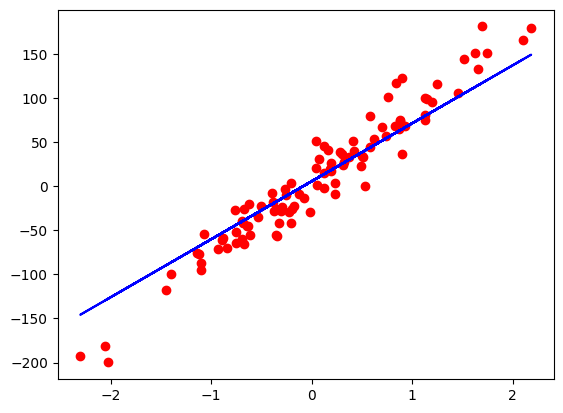

In [49]:
# plot
predicted = model(x).detach().numpy()
plt.plot(xNumpy, yNumpy, 'ro')
plt.plot(xNumpy, predicted, "b")
plt.show()